**SIMULATED ANNEALING ALGORITHM**

**bier127 Dataset (Optimal Solution - 118282)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

**Define Coordinate Class**

In [2]:
class Coordinate:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    #Calculate Euclidean distance between two coordinates
    @staticmethod
    def get_distance(a, b):
        return math.sqrt((a.x - b.x) ** 2 + (a.y - b.y) ** 2)
    
    #Compute total distance for a given route
    @staticmethod
    def get_total_distance(coords):
        dist = sum(Coordinate.get_distance(a, b) for a, b in zip(coords[:-1], coords[1:]))
        dist += Coordinate.get_distance(coords[0], coords[-1])
        return dist

**Load Dataset**

In [3]:
coordinates = [
    (9860, 14152), (9396, 14616), (11252, 14848), (11020, 13456), (9512, 15776),
    (10788, 13804), (10208, 14384), (11600, 13456), (11252, 14036), (10672, 15080),
    (11136, 14152), (9860, 13108), (10092, 14964), (9512, 13340), (10556, 13688),
    (9628, 14036), (10904, 13108), (11368, 12644), (11252, 13340), (10672, 13340),
    (11020, 13108), (11020, 13340), (11136, 13572), (11020, 13688), (8468, 11136),
    (8932, 12064), (9512, 12412), (7772, 11020), (8352, 10672), (9164, 12876),
    (9744, 12528), (8352, 10324), (8236, 11020), (8468, 12876), (8700, 14036),
    (8932, 13688), (9048, 13804), (8468, 12296), (8352, 12644), (8236, 13572),
    (9164, 13340), (8004, 12760), (8584, 13108), (7772, 14732), (7540, 15080),
    (7424, 17516), (8352, 17052), (7540, 16820), (7888, 17168), (9744, 15196),
    (9164, 14964), (9744, 16240), (7888, 16936), (8236, 15428), (9512, 17400),
    (9164, 16008), (8700, 15312), (11716, 16008), (12992, 14964), (12412, 14964),
    (12296, 15312), (12528, 15196), (15312, 6612), (11716, 16124), (11600, 19720),
    (10324, 17516), (12412, 13340), (12876, 12180), (13688, 10904), (13688, 11716),
    (13688, 12528), (11484, 13224), (12296, 12760), (12064, 12528), (12644, 10556),
    (11832, 11252), (11368, 12296), (11136, 11020), (10556, 11948), (10324, 11716),
    (11484, 9512), (11484, 7540), (11020, 7424), (11484, 9744), (16936, 12180),
    (17052, 12064), (16936, 11832), (17052, 11600), (13804, 18792), (12064, 14964),
    (12180, 15544), (14152, 18908), (5104, 14616), (6496, 17168), (5684, 13224),
    (15660, 10788), (5336, 10324), (812, 6264), (14384, 20184), (11252, 15776),
    (9744, 3132), (10904, 3480), (7308, 14848), (16472, 16472), (10440, 14036),
    (10672, 13804), (1160, 18560), (10788, 13572), (15660, 11368), (15544, 12760),
    (5336, 18908), (6264, 19140), (11832, 17516), (10672, 14152), (10208, 15196),
    (12180, 14848), (11020, 10208), (7656, 17052), (16240, 8352), (10440, 14732),
    (9164, 15544), (8004, 11020), (5684, 11948), (9512, 16472), (13688, 17516),
    (11484, 8468), (3248, 14152)
]




**Simulated Annealing Algorithm**

In [4]:
#SA params: 
# T0 = initial temperature
# r = cooling rate 
# max_iterations = max number of iterations

def Simulated(T0=40000, r=0.80, max_iterations=1000):

    #Turns dataset into Coordinate objects
    coords = [Coordinate(x, y) for x, y in coordinates]

    best_route = coords[:]
    best_distance = Coordinate.get_total_distance(coords)

    start_time = time.time()
    T = T0

    for _ in range(max_iterations):
        L = np.random.randint(10, 31)
        for _ in range(L):
            r1, r2 = np.random.randint(0, len(coords), size=2) 
            coords[r1], coords[r2] = coords[r2], coords[r1]

            current_distance = Coordinate.get_total_distance(coords) #swap cities

            #Acceptance probability
            if current_distance < best_distance or np.random.uniform() < np.exp((best_distance - current_distance) / T):
                best_distance = current_distance
                best_route = coords[:]
            else:
                coords[r1], coords[r2] = coords[r2], coords[r1] #revert swap

        T *= r
    
    best_route.append(best_route[0])

    end_time = time.time()
    cpu_time = end_time - start_time

    best_tour_indices = [coordinates.index((c.x, c.y)) for c in best_route]

    print(f"Best Tour: {best_tour_indices}")
    print(f"Best Length: {best_distance:.2f}")
    print(f"CPU Time: {cpu_time:.4f} seconds")

    fig, ax = plt.subplots(figsize=(10, 6))

    for first, second in zip(best_route[:-1], best_route[1:]):
        ax.plot([first.x, second.x], [first.y, second.y], 'b')
    ax.plot([best_route[0].x, best_route[-1].x], [best_route[0].y, best_route[-1].y], 'b')

    for i, c in enumerate(best_route):
        ax.plot(c.x, c.y, 'ro')
        ax.text(c.x + 1, c.y + 1, f'{i}', color='black', fontsize=8)

    ax.set_title('Simulated Annealing for Symmetric TSP')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    plt.show()


Implementations

1st

Best Tour: [8, 2, 105, 104, 113, 5, 107, 19, 14, 15, 36, 35, 94, 126, 92, 44, 56, 6, 23, 3, 22, 18, 66, 95, 118, 62, 81, 100, 101, 82, 68, 74, 69, 67, 73, 7, 20, 16, 21, 10, 115, 89, 61, 124, 91, 98, 88, 9, 28, 31, 24, 32, 38, 34, 43, 102, 39, 41, 33, 42, 0, 1, 49, 120, 55, 51, 4, 50, 13, 30, 25, 27, 121, 37, 123, 64, 112, 65, 54, 57, 90, 59, 58, 85, 86, 87, 108, 70, 72, 71, 17, 76, 77, 116, 80, 125, 83, 75, 78, 79, 26, 40, 53, 52, 46, 48, 117, 47, 45, 93, 111, 110, 106, 97, 96, 122, 29, 11, 119, 12, 114, 99, 63, 60, 103, 84, 109, 8]
Best Length: 195261.87
CPU Time: 3.6066 seconds


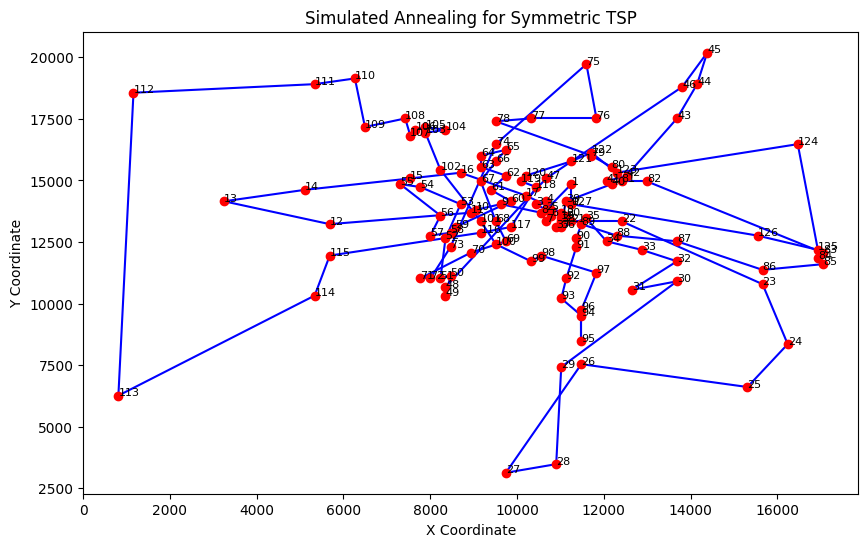

In [5]:
Simulated()

2nd

Best Tour: [40, 13, 43, 48, 52, 46, 54, 65, 112, 99, 114, 37, 24, 100, 101, 82, 80, 125, 81, 62, 118, 95, 108, 69, 73, 71, 7, 18, 16, 20, 19, 107, 5, 22, 21, 3, 23, 105, 14, 11, 30, 76, 17, 72, 66, 58, 103, 124, 89, 115, 8, 10, 113, 2, 12, 4, 55, 47, 45, 117, 53, 102, 44, 56, 49, 123, 64, 91, 98, 88, 63, 57, 90, 61, 60, 9, 119, 6, 120, 93, 110, 111, 51, 59, 109, 86, 84, 85, 87, 68, 32, 121, 27, 83, 116, 79, 78, 26, 29, 94, 122, 25, 74, 70, 67, 75, 77, 28, 31, 96, 97, 126, 106, 92, 50, 1, 0, 104, 15, 34, 39, 41, 38, 33, 42, 35, 36, 40]
Best Length: 198808.17
CPU Time: 2.9330 seconds


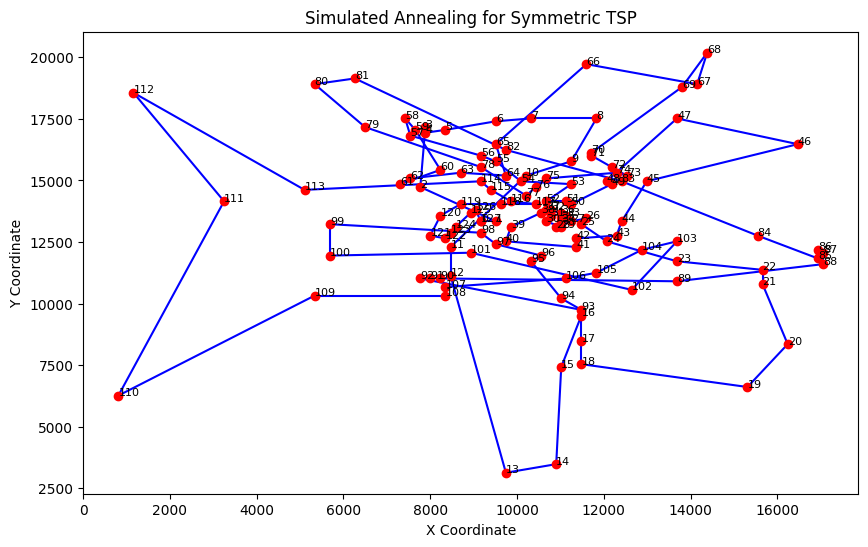

In [6]:
Simulated()

3rd

Best Tour: [76, 78, 79, 20, 16, 11, 13, 29, 24, 31, 116, 74, 75, 77, 19, 14, 105, 107, 5, 22, 18, 7, 71, 73, 67, 72, 59, 58, 69, 68, 62, 118, 95, 87, 86, 85, 108, 70, 66, 115, 89, 46, 45, 111, 64, 91, 88, 99, 114, 119, 2, 109, 84, 103, 63, 57, 9, 42, 33, 26, 30, 83, 80, 125, 81, 82, 97, 126, 94, 122, 96, 41, 38, 47, 52, 117, 48, 12, 113, 0, 104, 6, 49, 4, 55, 93, 110, 106, 92, 27, 121, 32, 25, 35, 1, 51, 54, 65, 8, 23, 10, 15, 44, 102, 43, 34, 39, 37, 28, 100, 101, 40, 36, 50, 53, 56, 120, 123, 112, 98, 124, 61, 60, 90, 3, 21, 17, 76]
Best Length: 217373.50
CPU Time: 6.7685 seconds


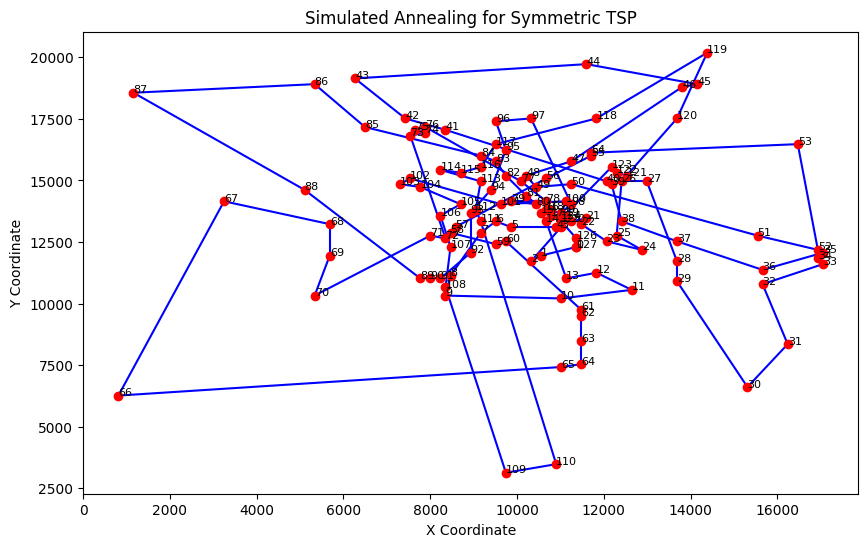

In [7]:
Simulated()

4th

Best Tour: [32, 24, 28, 31, 82, 81, 101, 100, 97, 106, 93, 50, 1, 15, 104, 14, 19, 78, 79, 0, 6, 2, 89, 9, 114, 56, 53, 44, 102, 43, 107, 3, 22, 23, 119, 51, 123, 120, 42, 33, 38, 29, 40, 26, 30, 76, 68, 69, 70, 109, 103, 58, 59, 67, 74, 118, 62, 37, 41, 39, 94, 92, 126, 122, 96, 80, 125, 83, 116, 77, 73, 72, 66, 71, 7, 115, 124, 88, 91, 98, 57, 18, 17, 16, 20, 21, 5, 105, 12, 49, 4, 55, 46, 48, 111, 110, 45, 117, 47, 52, 54, 65, 64, 112, 63, 99, 90, 61, 60, 8, 10, 113, 36, 34, 35, 13, 11, 108, 84, 85, 87, 86, 95, 75, 25, 121, 27, 32]
Best Length: 196812.89
CPU Time: 8.3188 seconds


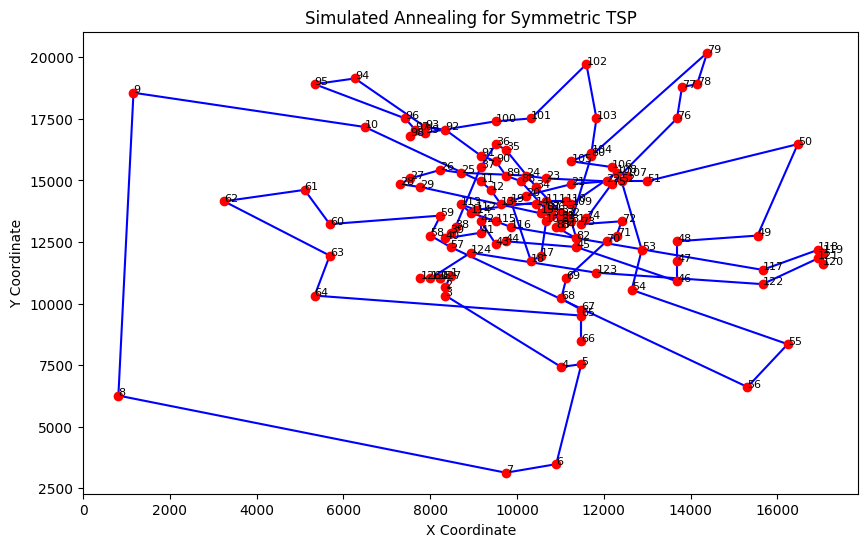

In [8]:
Simulated()

5th

Best Tour: [86, 109, 58, 9, 12, 49, 1, 50, 15, 0, 104, 66, 70, 69, 68, 67, 72, 7, 71, 23, 22, 18, 20, 17, 24, 121, 28, 31, 125, 82, 81, 75, 73, 89, 90, 112, 64, 120, 34, 40, 13, 11, 19, 30, 25, 32, 27, 41, 52, 46, 55, 4, 114, 2, 8, 115, 59, 61, 60, 57, 65, 54, 117, 47, 93, 45, 48, 123, 51, 99, 63, 124, 91, 98, 88, 103, 87, 118, 62, 101, 100, 79, 78, 77, 83, 80, 116, 42, 111, 110, 106, 126, 92, 94, 39, 35, 36, 119, 10, 113, 5, 105, 14, 33, 122, 97, 96, 102, 43, 44, 53, 56, 6, 107, 3, 21, 16, 29, 38, 37, 26, 76, 74, 95, 108, 84, 85, 86]
Best Length: 195972.17
CPU Time: 3.6033 seconds


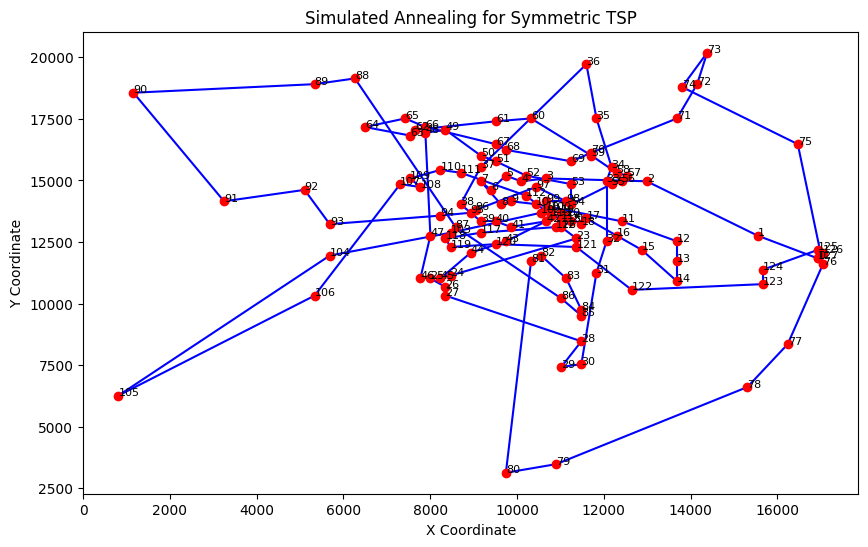

In [9]:
Simulated()

6th

Best Tour: [104, 76, 77, 125, 81, 82, 118, 95, 67, 73, 6, 49, 120, 56, 50, 1, 40, 42, 33, 24, 28, 31, 79, 16, 20, 17, 108, 86, 84, 66, 0, 53, 34, 32, 121, 96, 97, 122, 41, 39, 35, 36, 43, 102, 44, 47, 52, 117, 48, 54, 123, 55, 4, 51, 99, 89, 115, 61, 58, 59, 8, 23, 107, 19, 14, 105, 5, 113, 22, 3, 21, 71, 72, 69, 68, 74, 75, 78, 116, 83, 80, 100, 101, 62, 10, 2, 60, 90, 57, 63, 112, 88, 103, 85, 87, 109, 70, 7, 18, 30, 26, 29, 13, 11, 15, 119, 12, 114, 9, 124, 91, 98, 64, 65, 111, 110, 106, 38, 37, 25, 27, 94, 126, 92, 93, 45, 46, 104]
Best Length: 202854.00
CPU Time: 3.8710 seconds


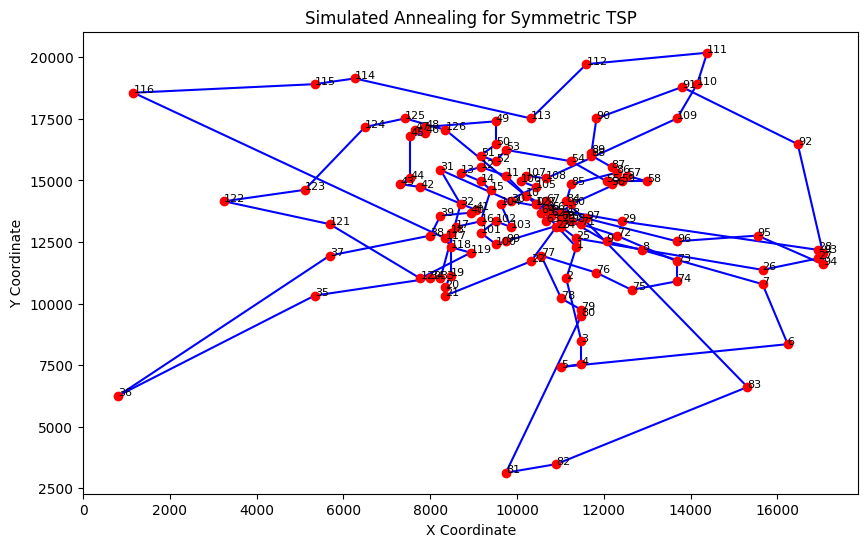

In [10]:
Simulated()

7th

Best Tour: [124, 91, 98, 88, 64, 112, 63, 77, 116, 83, 80, 125, 81, 82, 35, 34, 19, 71, 109, 86, 87, 108, 18, 7, 23, 107, 25, 24, 38, 33, 42, 29, 37, 32, 31, 28, 43, 117, 48, 45, 111, 110, 106, 93, 46, 54, 65, 114, 119, 72, 69, 95, 68, 67, 73, 20, 105, 12, 49, 53, 44, 102, 96, 101, 100, 97, 126, 92, 27, 121, 78, 76, 17, 16, 13, 40, 41, 122, 94, 39, 113, 89, 60, 90, 57, 99, 9, 2, 10, 8, 21, 3, 5, 1, 50, 56, 120, 4, 51, 123, 55, 52, 47, 36, 26, 79, 22, 14, 104, 6, 0, 15, 11, 30, 75, 74, 62, 118, 85, 84, 70, 66, 115, 59, 61, 58, 103, 124]
Best Length: 206023.05
CPU Time: 3.2123 seconds


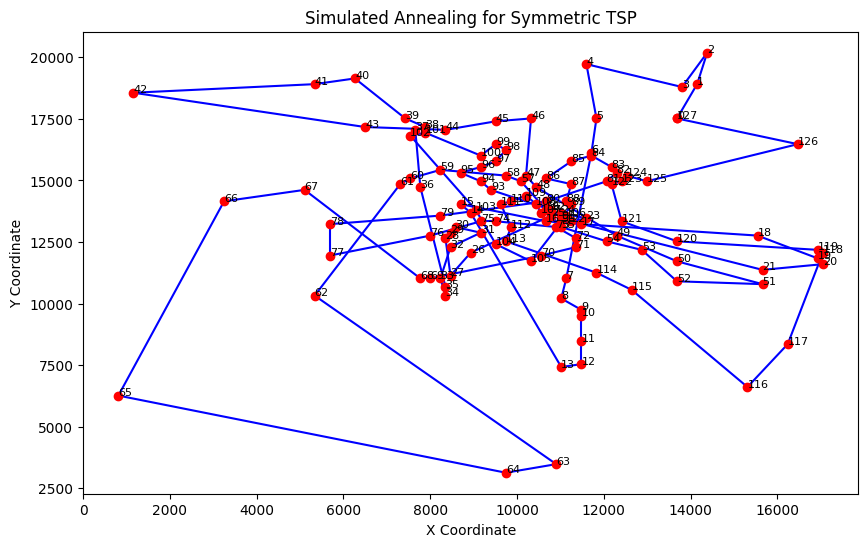

In [11]:
Simulated()

8th

Best Tour: [61, 124, 112, 57, 8, 10, 119, 12, 49, 120, 93, 111, 110, 106, 126, 92, 43, 15, 19, 107, 14, 6, 0, 39, 41, 28, 31, 79, 78, 11, 13, 40, 35, 42, 36, 50, 56, 48, 45, 117, 47, 53, 44, 102, 94, 122, 34, 1, 65, 99, 9, 5, 23, 105, 104, 113, 2, 63, 90, 60, 89, 115, 58, 85, 84, 86, 87, 95, 108, 69, 70, 109, 103, 88, 91, 98, 64, 25, 24, 32, 116, 75, 73, 72, 17, 20, 114, 51, 123, 54, 46, 52, 55, 4, 16, 76, 68, 74, 80, 101, 100, 97, 96, 27, 121, 37, 30, 26, 29, 38, 33, 77, 83, 125, 81, 82, 62, 118, 67, 71, 18, 21, 3, 22, 7, 66, 59, 61]
Best Length: 189542.32
CPU Time: 3.4596 seconds


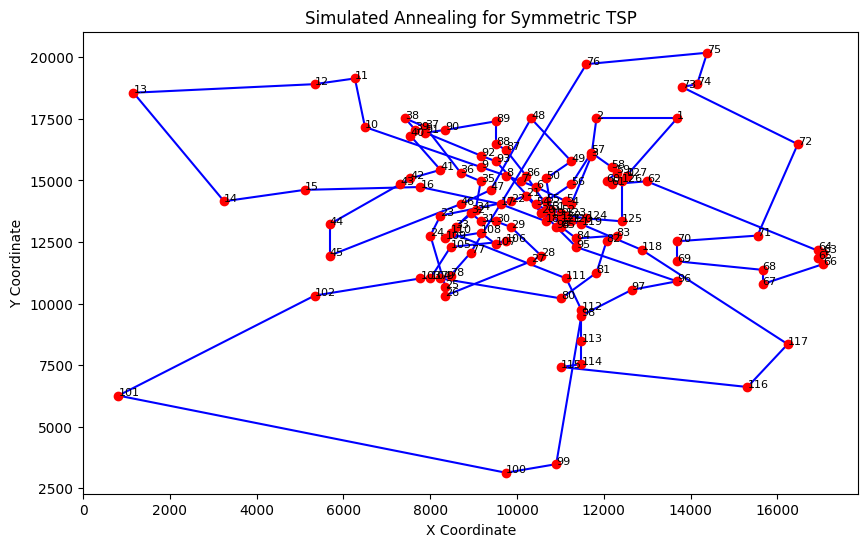

In [12]:
Simulated()

9th

Best Tour: [126, 122, 94, 102, 56, 9, 89, 115, 59, 61, 60, 23, 19, 29, 25, 32, 24, 16, 20, 21, 22, 7, 70, 86, 87, 95, 69, 58, 90, 112, 63, 99, 57, 88, 91, 98, 64, 46, 55, 4, 12, 0, 6, 119, 114, 49, 1, 15, 36, 35, 40, 13, 11, 78, 17, 107, 104, 113, 18, 76, 118, 62, 30, 26, 37, 38, 96, 97, 100, 101, 81, 125, 28, 121, 27, 31, 82, 80, 83, 116, 79, 53, 47, 52, 48, 111, 110, 106, 93, 45, 117, 43, 39, 41, 33, 42, 34, 50, 120, 123, 51, 2, 66, 72, 73, 71, 3, 14, 105, 5, 10, 8, 109, 84, 85, 108, 68, 74, 77, 75, 67, 103, 124, 65, 54, 44, 92, 126]
Best Length: 199463.24
CPU Time: 4.3785 seconds


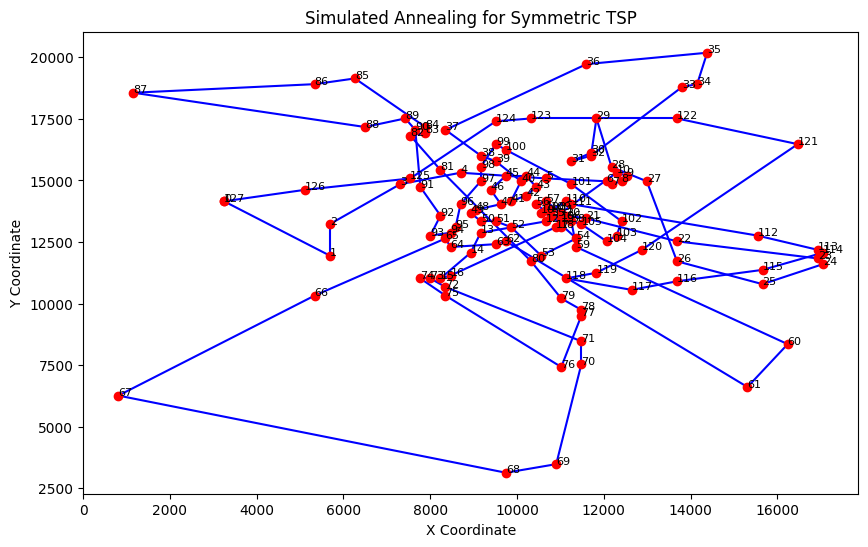

In [13]:
Simulated()

10th

Best Tour: [126, 97, 96, 25, 30, 19, 20, 16, 11, 40, 36, 15, 0, 1, 102, 106, 110, 111, 45, 117, 34, 39, 35, 89, 90, 60, 61, 86, 87, 95, 118, 62, 75, 14, 104, 48, 64, 98, 103, 57, 99, 9, 114, 12, 119, 113, 6, 49, 4, 55, 120, 50, 56, 53, 47, 52, 46, 54, 65, 63, 2, 105, 29, 26, 79, 78, 76, 73, 67, 72, 17, 37, 41, 94, 122, 121, 27, 32, 24, 28, 31, 82, 81, 80, 83, 69, 70, 66, 7, 71, 115, 59, 58, 109, 84, 85, 108, 68, 74, 125, 101, 100, 116, 77, 18, 8, 10, 5, 23, 22, 3, 21, 107, 13, 42, 33, 38, 43, 44, 123, 51, 112, 88, 91, 124, 93, 92, 126]
Best Length: 201697.86
CPU Time: 5.0047 seconds


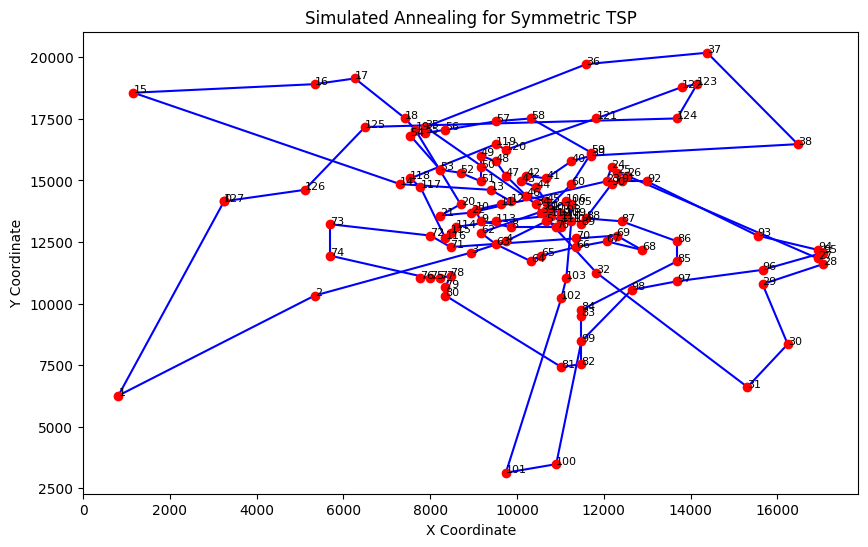

In [14]:
Simulated()